In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage
from sklearn.model_selection import train_test_split

In [51]:
from tensorflow.keras import layers, models, optimizers

In [52]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [65]:
train_y = train_raw['label'].values

train_x = train_raw['feature'].str.split()
test_x = test_raw['feature'].str.split()

In [66]:
train_x = np.array([np.array(l).astype(int) for l in train_x])
test_x = np.array([np.array(l).astype(int) for l in test_x])

In [67]:
train_x = (train_x.reshape((train_x.shape[0], 48, 48, 1)) - 128) / 255
test_x = (test_x.reshape((test_x.shape[0], 48, 48, 1)) - 128) / 255

In [68]:
train_x_flip = np.flip(train_x, 2)

In [125]:
train_x_rotate = ndimage.rotate(
    input=train_x,
    angle=-15,
    axes=[1,2],
    reshape=False)

In [121]:
train_x_rotate.shape

(40192, 48, 48, 1)

In [70]:
train_x, validate_x, train_y, validate_y = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

In [88]:
train_x_flip = np.flip(train_x, 2)
train_x = np.concatenate([train_x, train_x_flip], axis=0)
train_y = np.concatenate([train_y, train_y], axis=0)

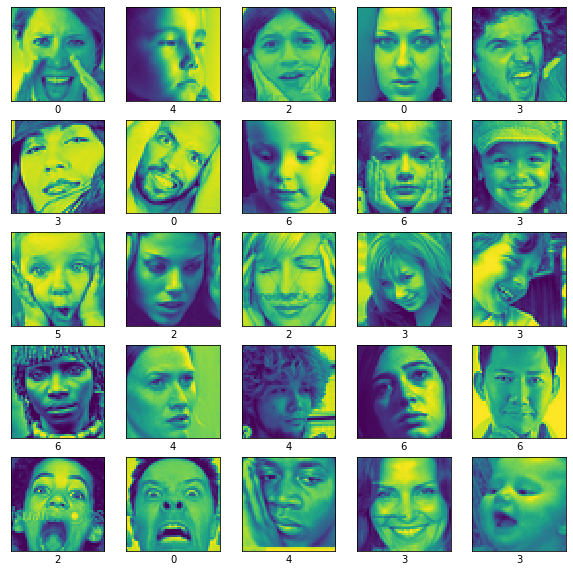

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i].reshape((48,48)))
    plt.xlabel(train_y[i])
plt.show()

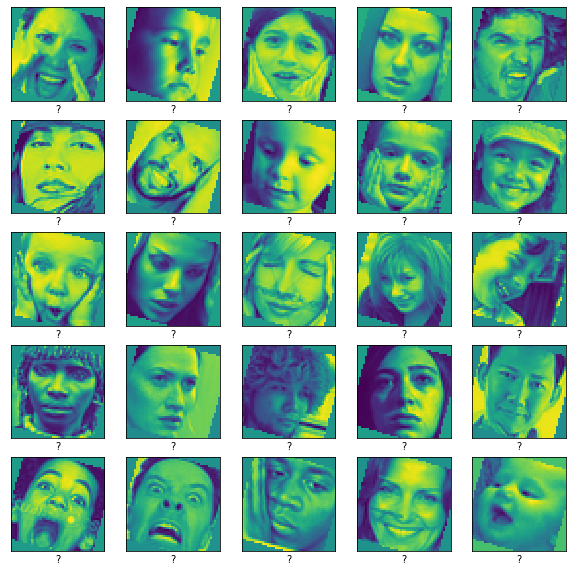

In [126]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x_rotate[i].reshape(48,48))
    plt.xlabel('?')
plt.show()

In [112]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(48,48,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(7, activation='softmax'))
    
    return model

In [113]:
model = build_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_43 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_44 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 24, 24, 32)      

In [114]:
model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizers.Adam(lr=0.01),
        metrics=['accuracy'])
model.fit(train_x, train_y, epochs=15, batch_size=256,
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)])

Epoch 1/15
40192/40192 [==============================] - 175s 4ms/sample - loss: 1.7344 - acc: 0.3200
Epoch 2/15
40192/40192 [==============================] - 170s 4ms/sample - loss: 1.3966 - acc: 0.4622
Epoch 3/15
40192/40192 [==============================] - 170s 4ms/sample - loss: 1.2685 - acc: 0.5158
Epoch 4/15
40192/40192 [==============================] - 170s 4ms/sample - loss: 1.1905 - acc: 0.5493
Epoch 5/15
40192/40192 [==============================] - 171s 4ms/sample - loss: 1.1267 - acc: 0.5756
Epoch 6/15
40192/40192 [==============================] - 169s 4ms/sample - loss: 1.0823 - acc: 0.5917
Epoch 7/15
40192/40192 [==============================] - 169s 4ms/sample - loss: 1.0384 - acc: 0.6090
Epoch 8/15
40192/40192 [==============================] - 169s 4ms/sample - loss: 0.9978 - acc: 0.6219
Epoch 9/15
40192/40192 [==============================] - 170s 4ms/sample - loss: 0.9599 - acc: 0.6406
Epoch 10/15
40192/40192 [==============================] - 170s 4ms/sampl

In [115]:
model.evaluate(validate_x, validate_y)

8613/8613 [==============================] - 8s 926us/sample - loss: 1.3643 - acc: 0.5599


[1.3642532235859413, 0.5598514]

In [6]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 20s 0us/step


In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]